<a href="https://colab.research.google.com/github/markoutsikou/DWS101-ML/blob/main/ML_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# **ΜΕΡΟΣ 1 - ΛΟΓΙΣΤΙΚΗ ΠΑΛΙΝΔΡΟΜΗΣΗ**






# **Ερώτημα 1**

# Load Dataset

In [7]:
df = pd.read_csv('diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Plot Variables

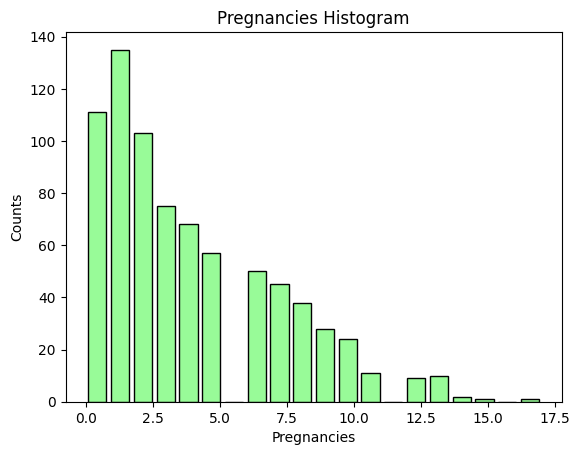

In [8]:
df['Pregnancies'].hist(bins = 20, color = 'palegreen', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Pregnancies Histogram')
plt.xlabel('Pregnancies')
plt.ylabel('Counts')
plt.show()

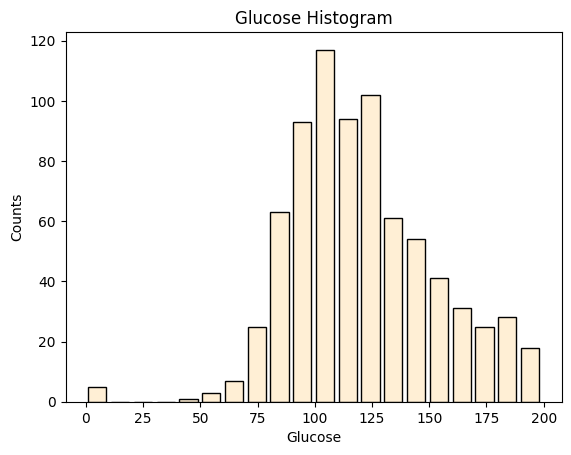

In [9]:
df['Glucose'].hist(bins = 20, color = 'papayawhip', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Glucose Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()

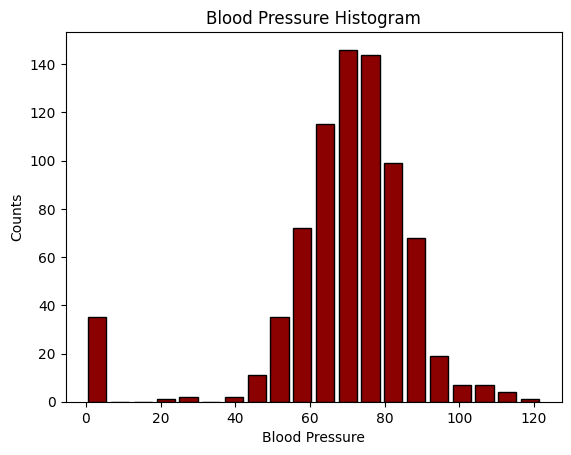

In [10]:
df['BloodPressure'].hist(bins = 20, color = 'darkred', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Blood Pressure Histogram')
plt.xlabel('Blood Pressure')
plt.ylabel('Counts')
plt.show()

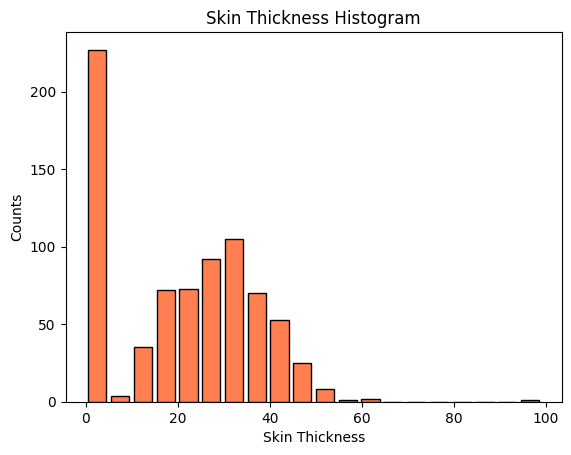

In [11]:
df['SkinThickness'].hist(bins = 20, color = 'coral', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Skin Thickness Histogram')
plt.xlabel('Skin Thickness')
plt.ylabel('Counts')
plt.show()

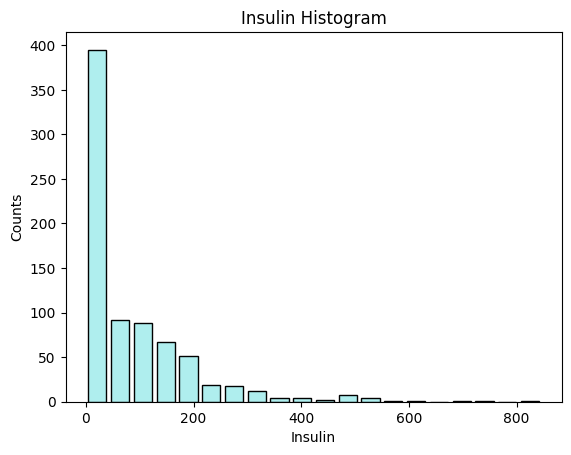

In [12]:
df['Insulin'].hist(bins = 20, color = 'paleturquoise', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()

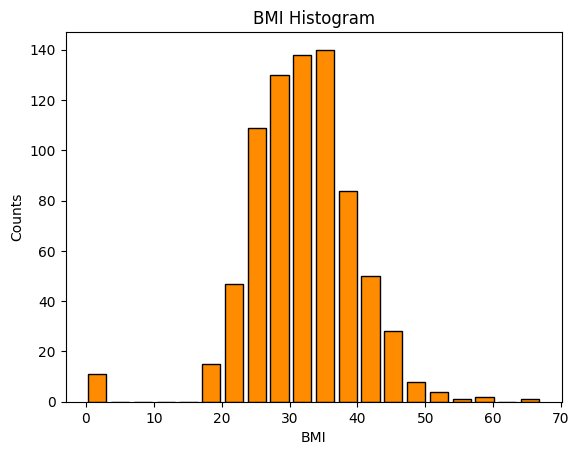

In [13]:
df['BMI'].hist(bins = 20, color = 'darkorange', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.show()

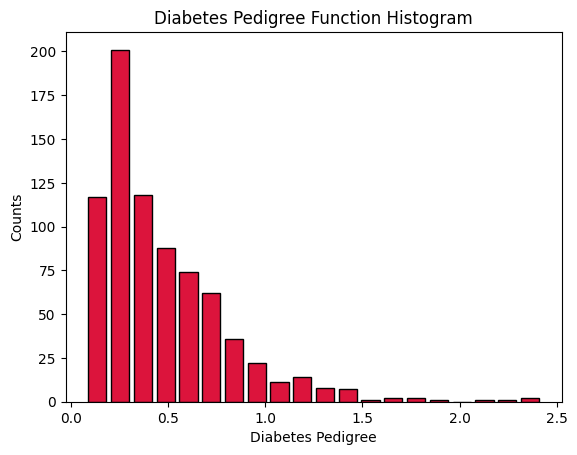

In [14]:
df['DiabetesPedigreeFunction'].hist(bins = 20, color = 'crimson', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Diabetes Pedigree Function Histogram')
plt.xlabel('Diabetes Pedigree')
plt.ylabel('Counts')
plt.show()

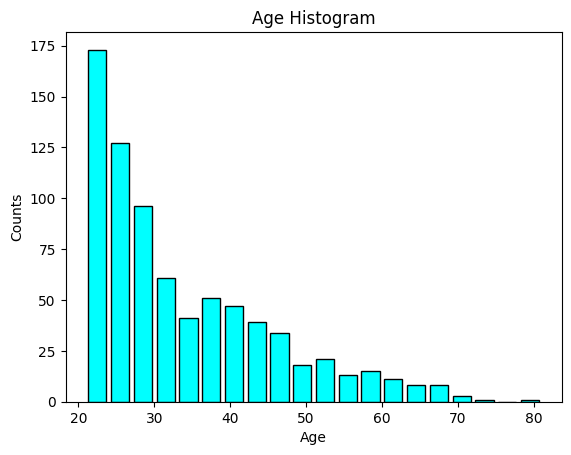

In [15]:
df['Age'].hist(bins = 20, color = 'cyan', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

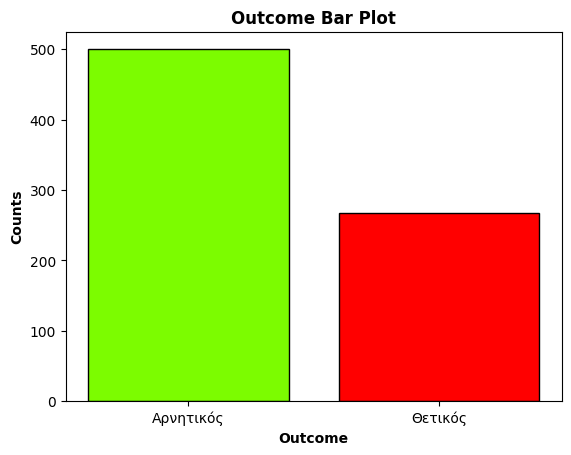

In [16]:
labels = np.array(['Αρνητικός', 'Θετικός'])
counts = df['Outcome'].value_counts()
plt.bar(labels, counts, edgecolor = 'black', width=0.8, color=['lawngreen','red'])
plt.title('Outcome Bar Plot', fontweight = 'bold')
plt.xlabel('Outcome', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()


# **Ερώτημα 2**
Παρατηρώντας τα αποτελέσματα του ερωτήματος 1 έχουμε:

*   Υπάρχουν πολλές μηδενικές στις μεταβλητές Insuline, Glucose, Blood Pressure, BMI κτλ.
*   Αντίθετα, υπάρχουν και πολύ μεγάλες τιμές, που παραπέμπουν σε ακραίες τιμές (outliers), σε μεταβλητές όπως Pregnancies (max 17) και BMI (max 67.1).

Επομένως, καταλήγουμε στο συμπέρασμα ότι η ποιότητα των δεδομένων μας είναι κακή και ενδεχομένως χρειάζονται κάποιου είδους επεξεργασία.  

# **Ερώτημα 3**
Η μεταβλητή Age ακολουθεί λογαριθμική κατανομή θετικά ασύμμετρη ή ασύμμετρη προς τα δεξιά. Αυτό συμβαίνει γιατί έχουμε μεγαλύτερο πλήθος παρατηρήσεων στις μικρότερες ηλικίες και λιγότερες στις πιο μεγάλες ηλικίες.
Η κατάνομη αυτή δεν είναι καλή για την κατασκευή της συγκεκριμένης εφαρμογής γιατί οι μεγαλύτερες ηλικίες δεν εκπροσωπούνται επαρκώς και μπορεί να οδηγηθούμε σε μεροληπτικό μοντέλο.

# **Ερώτημα 4**


Αρκεί να εξετάσουμε το correlation μεταξύ της μεταβλητής Glucose και του Outcome.

In [17]:
df.corr()['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


Παρότι για να πούμε ότι έχουμε ισχυρή συσχέτιση, καλό είναι να έχουμε συσχέτιση > 0.6, παρατηρούμε ότι η Glucose είναι η μεταβλητή με τη μεγαλύτερη θετική συσχέτιση ως προς το Outcome, δηλαδή την εμφάνιση διαβήτη.

# **Ερώτημα 5**

# Convert DataFrame to Numpy arrays

In [18]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

# Split Dataset to Train-Test

In [19]:
seed = 0
test_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

print('Train Set:', len(x_train))
print('Test Set:', len(x_test))

Train Set: 537
Test Set: 231


# **Ερώτημα 6**

# Create a Logistic Regression Model

In [20]:
model = LogisticRegression(max_iter=1000, random_state=seed)

# Train model on training set

In [21]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

# Evaluate Model on test set

In [22]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [27]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_percentage_train = round(accuracy_train*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')
print(f'The accuracy of the train is: {accuracy_percentage_train}')

The accuracy of the model is: 77.92
The accuracy of the train is: 76.54


Παρατηρούμε ότι η ακρίβεια (accuracy score) είναι σχεδόν ίδια και στο train test και στο test set. Αυτό σημαίνει ότι το μοντέλο μας εκπαιδεύτηκα καλά, χωρίς να κάνει overfitting.

# **Ερώτημα 7**

/tmp/ipython-input-4039352227.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_by_age = valid_df.groupby('Age Group')['Outcome'].value_counts()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (231,) and arg 1 with shape (6,).

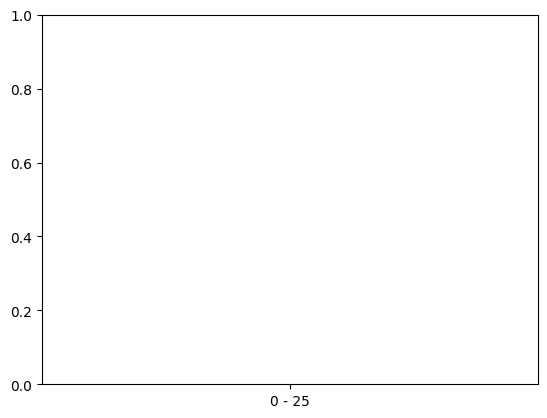

In [37]:
valid_df = pd.DataFrame(x_test, columns=input_df.columns)
valid_df['Outcome'] = y_test
valid_df['Predicted Outcome'] = y_pred
valid_df['Age Group'] = pd.cut(valid_df['Age'], bins = 3, labels = ['0 - 25', '25 - 50', '>50'])
group_by_age = valid_df.groupby('Age Group')['Outcome'].value_counts()

plt.bar(valid_df['Age Group'], group_by_age, edgecolor = 'black', width=0.8, color=['lawngreen','red'])
plt.title('Outcome Bar Plot', fontweight = 'bold')
plt.xlabel('Age Group', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

# **Ερώτημα 8**
Κατά τη γνώμη μου, είναι προτιμότερο ο ταξιονομητής να προβλέπει εσφαλμένα ότι ο ασθενής έχει διαβήτη παρά να μην καταφέρει να το προβλέψει. Στην πρώτη περίπτωση ο ασθενής μπορεί να υποβληθεί σε εξετάσεις και να γίνει η σωστή διάγνωση, ενώ στην δεύτερη περίπτωση ο ασθενής μπορεί να μην λάβει την απαραίτητη φροντίδα και να γίνει η διάγνωσή του αρκετά αργότερα.

# **Ερώτημα 9**

In [39]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

for seed in range(0, 10):
  test_size = 0.1

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)
  x_train.shape, y_train.shape, x_test.shape, y_test.shape

  model = LogisticRegression(max_iter=1000, random_state=seed)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  mean = np.mean(y_pred == y_test)
  sandard_deviation = np.std(y_pred == y_test)

print('Train Set:', len(x_train))
print('Test Set:', len(x_test))
print(f'The mean accuracy of the model is: {mean}')
print(f'The accuracy standard deviation of the model is: {sandard_deviation}')

Train Set: 537
Test Set: 231
The mean accuracy of the model is: 0.7445887445887446
The accuracy standard deviation of the model is: 0.4360921301978538


# **Ερώτημα 10**


# Feature Importance

The larger the absolute weight value, the better

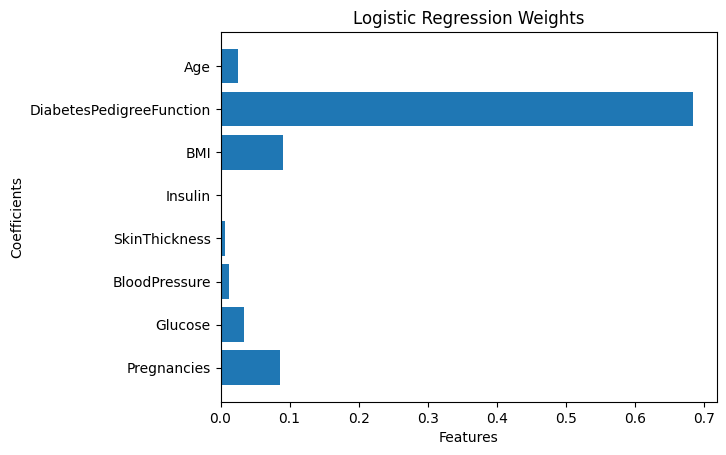

In [28]:
coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

# Evaluate Patients with Age < 40

In [25]:
input_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [26]:
# Create a mask that filters patients with age < 40. Age is found at x_test[:, 7]
age_index = 7
mask_40 = x_test[:, 7] < 40

x_test_40 = x_test[mask_40]
y_test_40 = y_test[mask_40]
y_pred_40 = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

The accuracy of the model is: 77.92
